# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [56]:
#import nvidia.cudnn
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Shape x_train:
(50000, 32, 32, 3)

Number of dimensions:
4

Datatypes:
uint8

Shape x_test:
(10000, 32, 32, 3)


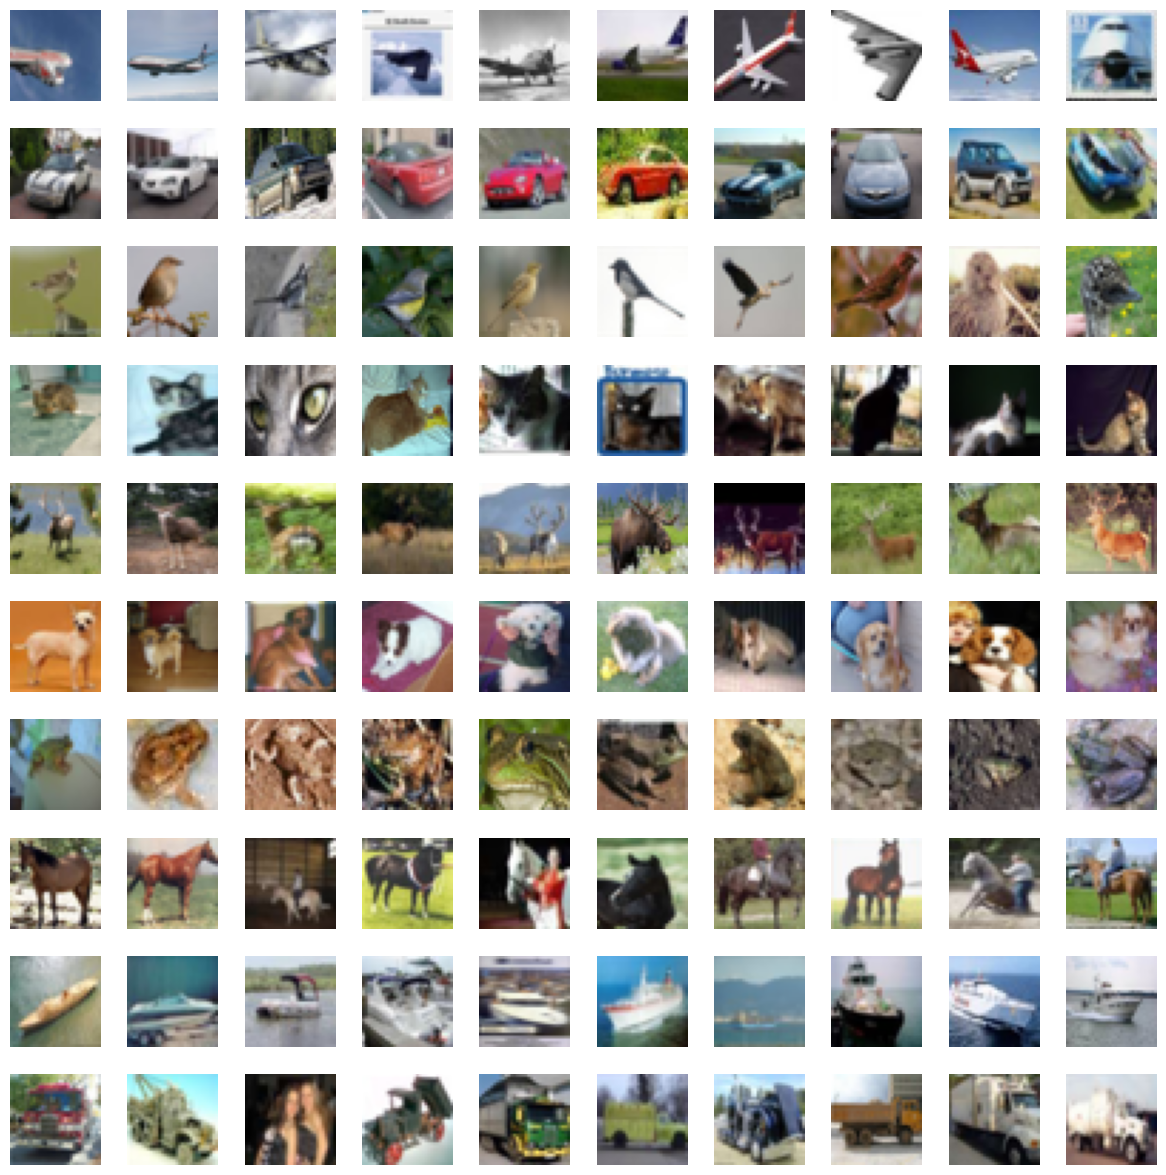

After reshaping:
(50000, 32, 32, 3, 1)
5
float32
(10000, 32, 32, 3, 1)
(50000, 10)
(10000, 10)


In [57]:
# Your code here 
print("Shape x_train:")
print(x_train.shape)
print()
print("Number of dimensions:")
print(x_train.ndim)
print()
print("Datatypes:")
print(x_train.dtype)
print()
print("Shape x_test:")
print(x_test.shape)


## Visualisize images
# read call lables
class_names = np.unique(y_train)

# Set up the figure for a 10x10 plot
fig, axes = plt.subplots(10, 10, figsize=(15, 15))

for i in range(10):
    # Get indices for images of class i
    indices = np.where(y_train == i)[0]
    # Randomly select 10 indices from the class
    random_indices = np.random.choice(indices, size=10, replace=False)
    
    for j, idx in enumerate(random_indices):
        # Plot the image in the appropriate subplot
        axes[i, j].imshow(x_train[idx])
        axes[i, j].axis('off')  # Hide axis ticks
        if j == 0:
            axes[i, j].set_ylabel(class_names[i], fontsize=12)  # Label the class

plt.subplots_adjust(wspace=0.1, hspace=0.3)
plt.show()

# converts the data type of the x_train array to float32
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

print('After reshaping:')

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print(x_train.shape)
print(x_train.ndim)
print(x_train.dtype)
print(x_test.shape)

# converts target to categorical data
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(y_train.shape)
print(y_test.shape)



## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer. 

Use the input as (32,32,3). 

The filter maps can then be flattened to provide features to the classifier. 

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [58]:
from keras.backend import clear_session
clear_session()

In [59]:
# Your code here :
from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

## init the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [60]:
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3, 1)
(50000, 10)


In [61]:
# Your code here :

# train settings
batch_size = 512
num_classes = 10
epochs = 50


# configure the learning process
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics = ['accuracy'])


print(x_train.shape)
print(x_train.ndim)
print(x_train.dtype)
print(x_test.shape)


# train model
history_m1 = model.fit(x_train, y_train, 
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test))


(50000, 32, 32, 3, 1)
5
float32
(10000, 32, 32, 3, 1)
Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.2301 - loss: 2.1287 - val_accuracy: 0.2708 - val_loss: 2.0375
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3033 - loss: 1.9734 - val_accuracy: 0.3111 - val_loss: 1.9401
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3452 - loss: 1.8801 - val_accuracy: 0.3388 - val_loss: 1.8722
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3660 - loss: 1.8217 - val_accuracy: 0.3559 - val_loss: 1.8147
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3865 - loss: 1.7707 - val_accuracy: 0.3609 - val_loss: 1.7832
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3987 - loss: 1.7346 - val_accuracy: 0.4043 - val_loss: 1.7118
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4124 - loss: 1.6967 - val_accuracy: 0.3995 - val_loss: 1.7105
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0

*   Plot the cross entropy loss curve and the accuracy curve

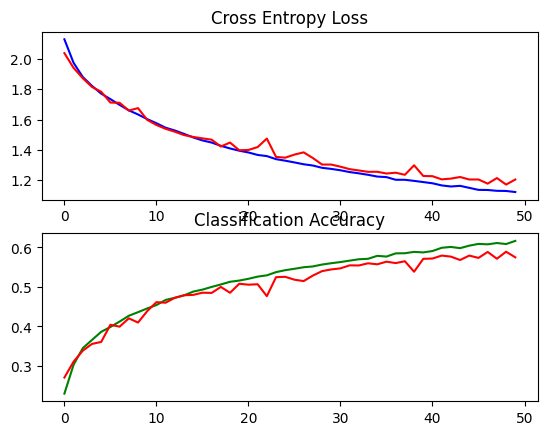

In [62]:
# Your code here :

# plot entropy loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history_m1.history['loss'], color='blue', label='train')
plt.plot(history_m1.history['val_loss'], color='red', label='val')

# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history_m1.history['accuracy'], color='green', label='train')
plt.plot(history_m1.history['val_accuracy'], color='red', label='val')
plt.show()


## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3. 

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [63]:
from keras.backend import clear_session
clear_session()

In [64]:
# Your code here :

# init model
vgg_model = Sequential()

# add Convolutional-Layer 
vgg_model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
vgg_model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

# add MaxPooling-Layer
vgg_model.add(MaxPooling2D((2, 2), padding='same'))

# Flatten output
vgg_model.add(Flatten())


# add Dense-Layer with 128 units
vgg_model.add(Dense(128, activation='relu'))

# add output layer (10 classes)
vgg_model.add(Dense(10, activation='softmax'))

# model summary
vgg_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,060,138 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [65]:
# Your code here :

# train settings
batch_size = 512
num_classes = 10
epochs = 50

# compile the model
vgg_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# train model
history_m2 = vgg_model.fit(x_train, y_train, 
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test))



Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.2009 - loss: 2.2209 - val_accuracy: 0.2408 - val_loss: 2.1247
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.2744 - loss: 2.0435 - val_accuracy: 0.3023 - val_loss: 1.9709
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3022 - loss: 1.9717 - val_accuracy: 0.3295 - val_loss: 1.9025
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3351 - loss: 1.8936 - val_accuracy: 0.3463 - val_loss: 1.8501
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3511 - loss: 1.8462 - val_accuracy: 0.3658 - val_loss: 1.8051
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3713 - loss: 1.7966 - val_accuracy: 0.3795 - val_loss: 1.7591
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3839 - loss: 1.7618 - val_accuracy: 0.3897 - val_loss: 1.7379
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3953 - loss: 1.7265 - val_accuracy: 0.3827 - v

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.
 

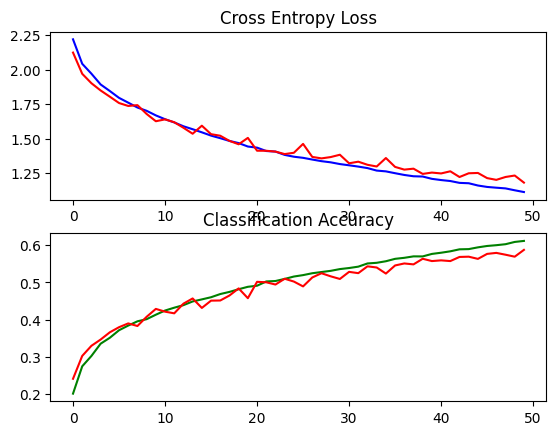

In [66]:
# Your code here :

# plot entropy loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history_m2.history['loss'], color='blue', label='train')
plt.plot(history_m2.history['val_loss'], color='red', label='val')

# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history_m2.history['accuracy'], color='green', label='train')
plt.plot(history_m2.history['val_accuracy'], color='red', label='val')
plt.show()

**Comment on the observation**

*(Double-click or enter to edit)*

Accuracy is not so good

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


In [67]:
# Your code here :

from sklearn.metrics import confusion_matrix

# predict output for test data
predictions = model.predict(x_test)

print(predictions.shape)
predictions = np.argmax(predictions, axis=1)

# print confusion matrix
gt = np.argmax(y_test, axis=1)
confusion_matrix(gt, predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000, 10)


array([[601,  64,  84,  12,  11,  14,   6,  10, 102,  96],
       [ 22, 736,  10,   5,   4,   3,   2,   9,  30, 179],
       [ 86,  22, 507,  66,  80,  83,  43,  67,  18,  28],
       [ 27,  33,  99, 380,  62, 203,  33,  71,  16,  76],
       [ 36,  18, 171,  69, 448,  63,  38, 124,   9,  24],
       [ 19,  12,  86, 147,  55, 492,  18, 117,  16,  38],
       [ 12,  32,  96, 109, 103,  46, 505,  34,  12,  51],
       [ 15,  14,  49,  36,  50,  70,   6, 679,   8,  73],
       [ 86, 100,  22,   8,   3,  11,   0,   9, 677,  84],
       [ 25, 155,  16,   9,   6,  13,   6,  23,  23, 724]])

**Comment here :**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [68]:
# Your code here :

# Evaluate the model on the test dataset
test_loss, test_accuracy = vgg_model.evaluate(x_test, y_test)

# Print the test accuracy
print(f'Test Accuracy: {test_accuracy:.3f}')
print(f'Test loss: {test_loss:.3f}')  

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5874 - loss: 1.1823
Test Accuracy: 0.587
Test loss: 1.182


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer. 

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling. 

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [69]:
from keras.backend import clear_session
clear_session()

In [70]:
# Your code here :

# init model
vgg_model = Sequential()

# add Convolutional-Layer 
vgg_model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
vgg_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

# add MaxPooling-Layer
vgg_model.add(MaxPooling2D((2, 2), padding='same'))


# add 2 more Convolutional-Layer 
vgg_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
vgg_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))

# add MaxPooling-Layer
vgg_model.add(MaxPooling2D((2, 2), padding='same'))

# Flatten output
vgg_model.add(Flatten())

# add Dense-Layer with 128 units
vgg_model.add(Dense(128, activation='relu'))

# add classification layer (10 classes)
vgg_model.add(Dense(10, activation='softmax'))

# model summary
vgg_model.summary()

/home/georg/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,310,154 (5.00 MB)

 Trainable params: 1,310,154 (5.00 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [71]:
# Your code here :

# train settings
batch_size = 512
num_classes = 10
epochs = 50

# compile the model
vgg_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# train model
history_m3 = vgg_model.fit(x_train, y_train, 
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test))


# predict output for test data
predictions = vgg_model.predict(x_test)

print(predictions.shape)
predictions = np.argmax(predictions, axis=1)

# print confusion matrix
gt = np.argmax(y_test, axis=1)
confusion_matrix(gt, predictions)





Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.1384 - loss: 2.2957 - val_accuracy: 0.1881 - val_loss: 2.2878
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.1932 - loss: 2.2706 - val_accuracy: 0.2096 - val_loss: 2.2402
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.2260 - loss: 2.1680 - val_accuracy: 0.2026 - val_loss: 2.1240
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.2593 - loss: 2.0573 - val_accuracy: 0.2796 - val_loss: 2.0170
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.2930 - loss: 1.9883 - val_accuracy: 0.3122 - val_loss: 1.9313
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.3213 - loss: 1.9252 - val_accuracy: 0.3458 - val_loss: 1.8778
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.3365 - loss: 1.8727 - val_accuracy: 0.3436 - val_loss: 1.8242
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.3583 - loss: 1.8092 - val_accuracy: 0.3620 - v

array([[727,  29,  35,   9,   9,  16,   9,  27, 107,  32],
       [ 31, 768,   9,  16,   1,  10,   3,  15,  34, 113],
       [ 87,  14, 461,  56,  85, 137,  50,  82,  20,   8],
       [ 30,  16,  69, 318,  62, 333,  61,  62,  18,  31],
       [ 42,  11, 106,  40, 479, 104,  53, 133,  23,   9],
       [ 21,   3,  42,  97,  42, 680,  21,  77,  11,   6],
       [  7,  18,  55,  56,  59, 110, 634,  33,  15,  13],
       [ 24,  10,  27,  30,  49,  99,   4, 737,   7,  13],
       [ 89,  68,   8,  13,   7,  19,   0,  11, 760,  25],
       [ 34, 171,  13,   8,   3,  26,  14,  44,  55, 632]])

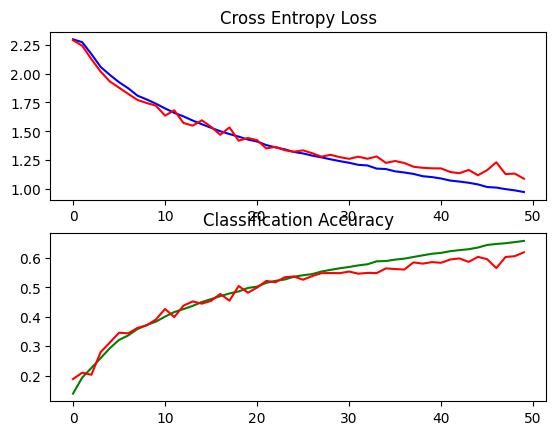

In [72]:
# plot entropy loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history_m3.history['loss'], color='blue', label='train')
plt.plot(history_m3.history['val_loss'], color='red', label='val')

# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history_m3.history['accuracy'], color='green', label='train')
plt.plot(history_m3.history['val_accuracy'], color='red', label='val')
plt.show()



In [73]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = vgg_model.evaluate(x_test, y_test)

# Print the test accuracy
print(f'Test Accuracy: {test_accuracy:.3f}')
print(f'Test loss: {test_loss:.3f}')  

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6196 - loss: 1.0915
Test Accuracy: 0.620
Test loss: 1.091


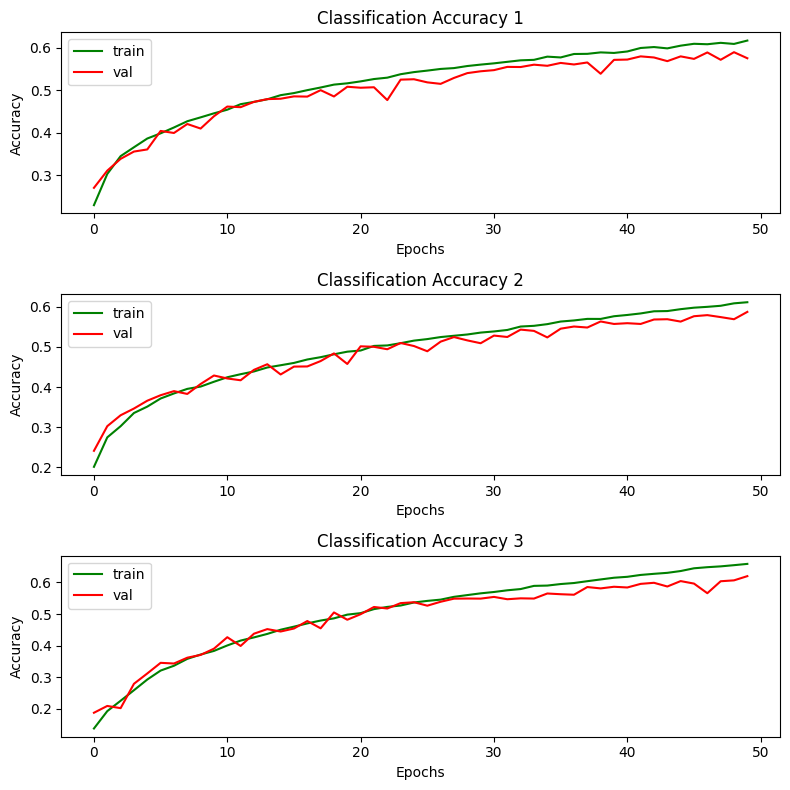

In [74]:
# Create a figure with 3 subplots
plt.figure(figsize=(8, 8))

# Plot accuracy for Model 1
plt.subplot(311)  # 3 rows, 1 column, 1st subplot
plt.title('Classification Accuracy 1')
plt.plot(history_m1.history['accuracy'], color='green', label='train')
plt.plot(history_m1.history['val_accuracy'], color='red', label='val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot accuracy for Model 2
plt.subplot(312)  # 3 rows, 1 column, 2nd subplot
plt.title('Classification Accuracy 2')
plt.plot(history_m2.history['accuracy'], color='green', label='train')
plt.plot(history_m2.history['val_accuracy'], color='red', label='val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot accuracy for Model 3
plt.subplot(313)  # 3 rows, 1 column, 3rd subplot
plt.title('Classification Accuracy 3')
plt.plot(history_m3.history['accuracy'], color='green', label='train')
plt.plot(history_m3.history['val_accuracy'], color='red', label='val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the combined plot
plt.tight_layout()  # Adjust subplots to fit into figure area
plt.show()


# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:

    -   brings non-linearity into the model
    -   brings the output in the range (0,1)
    -   prevents overfitting

_

2 - Key Differences between sigmoid and softmax:

    -   sigmoid is used for binary classification and softmax is used for multi class classification
    -   sigmoid outputs a single value and softmax a vector of values

_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:

    -   categorical crossentropy loss shows how well is the prediction across all classes
    -   binary crossentropy loss shows the fit between predicted and binary target values
_
